 Dataset loaded successfully!

 Exploring the dataset's structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB

 Here are the first 5 rows to give you a feel for the data:
   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina 

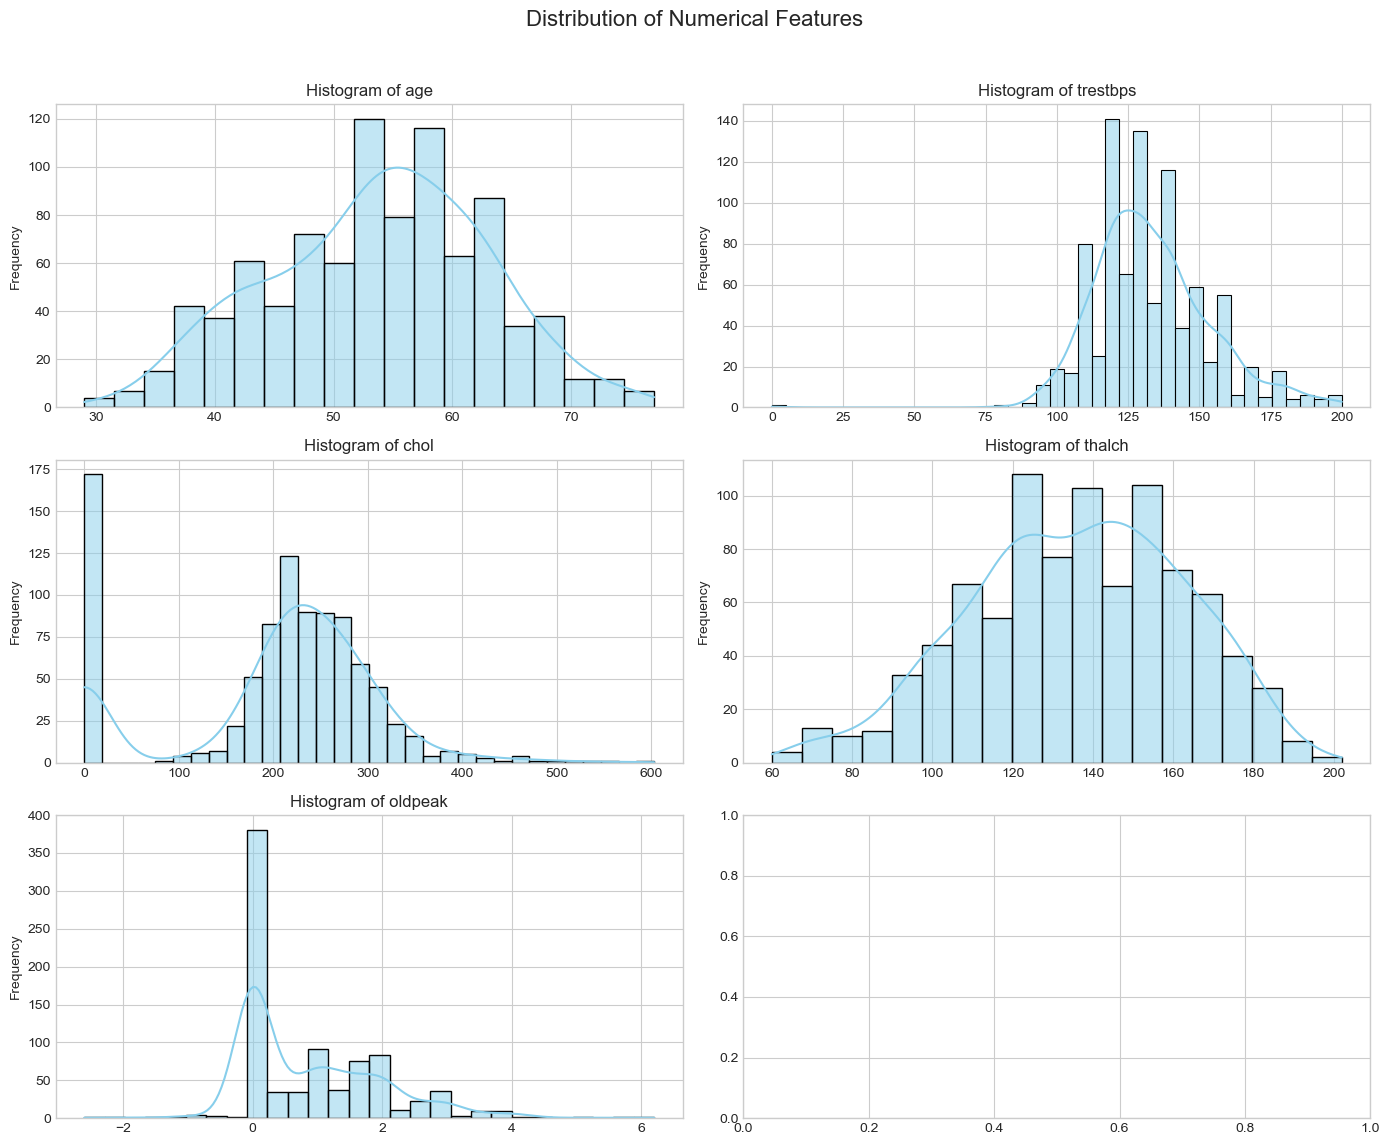

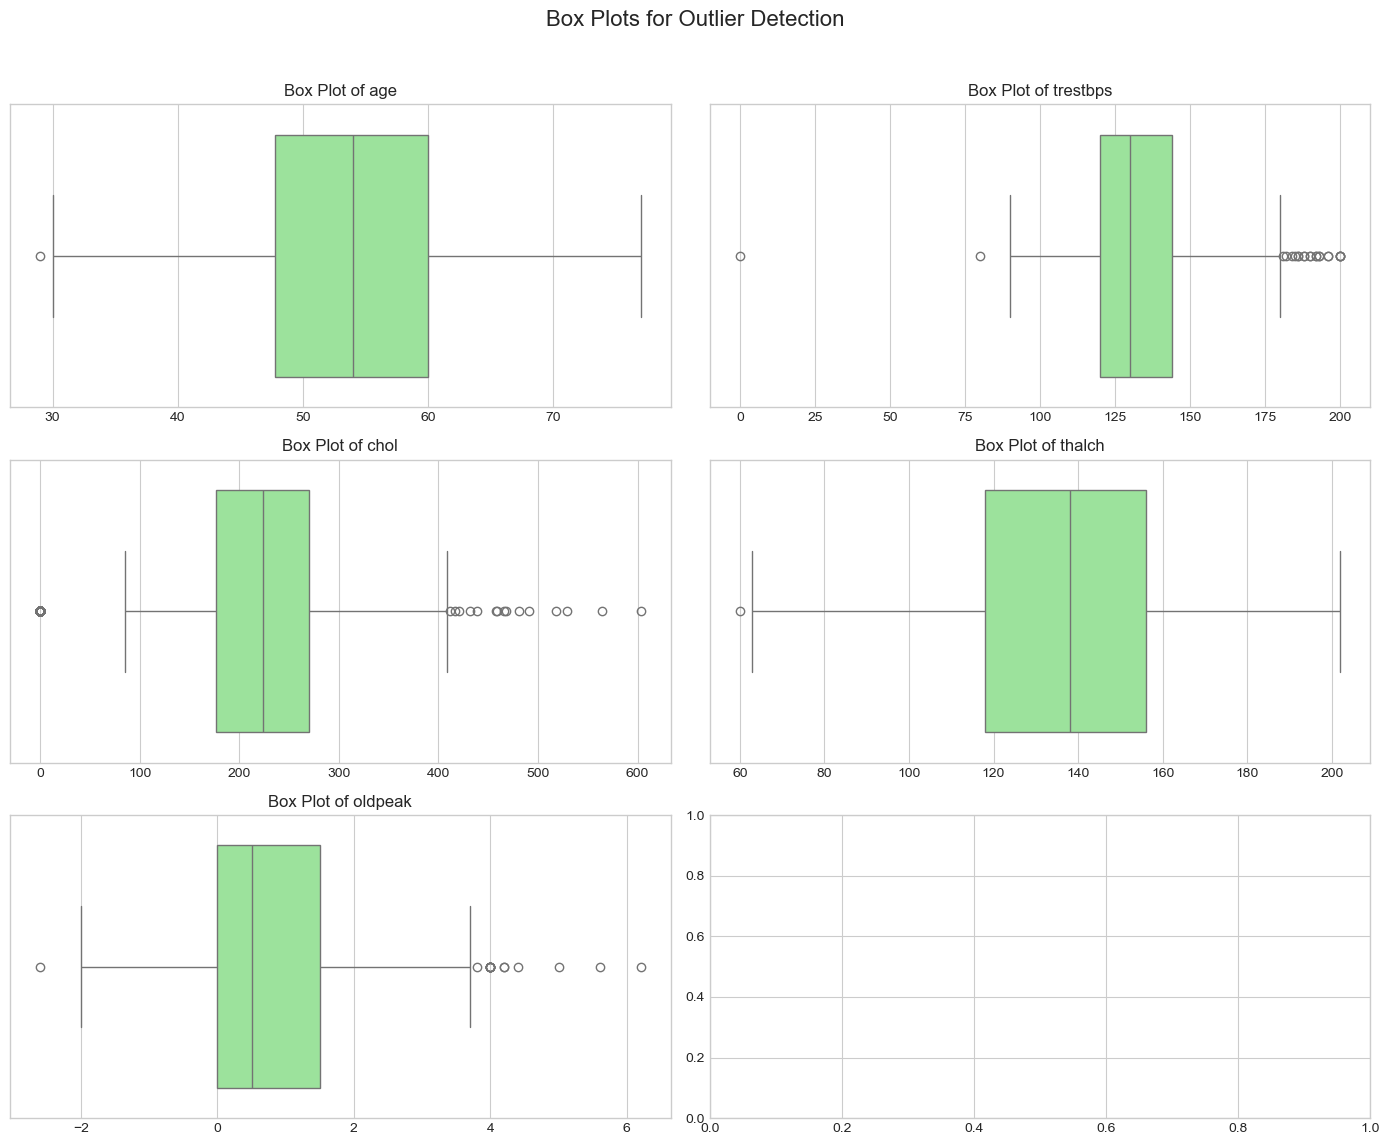

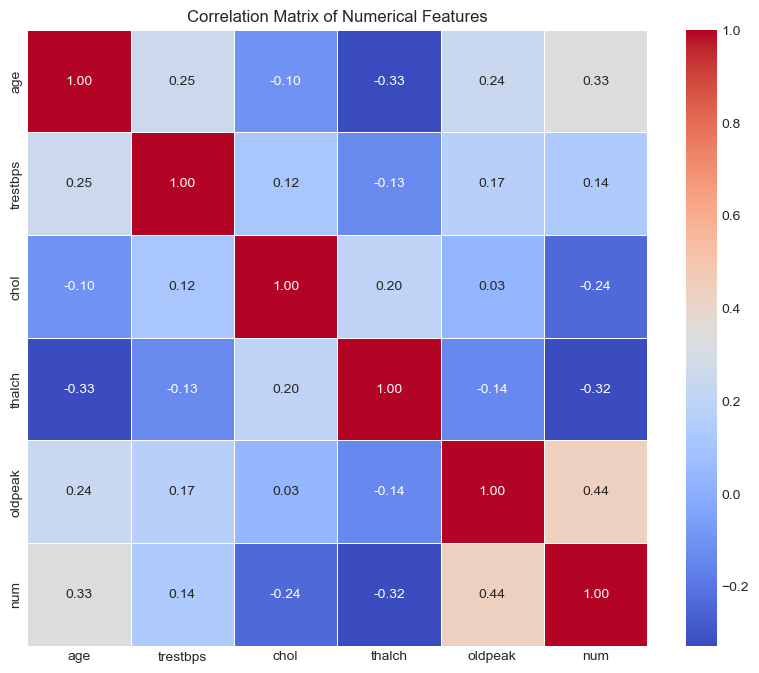


🛠️ Step 2: Feature Engineering

Transformed DataFrame after one-hot encoding:
   age  trestbps  chol  fbs  thalch  oldpeak  target  sex_Male  \
0   63       145   233    1     150      2.3       0      True   
1   41       135   203    0     132      0.0       0      True   
2   57       140   192    0     148      0.4       0      True   
3   52       118   186    0     190      0.0       0      True   
4   57       110   201    0     126      1.5       0      True   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0               False           False               True           False   
1                True           False              False            True   
2               False           False              False            True   
3               False           False               True           False   
4               False           False              False            True   

   restecg_st-t abnormality  exang_TRUE  exang_TURE  slope_flat  \


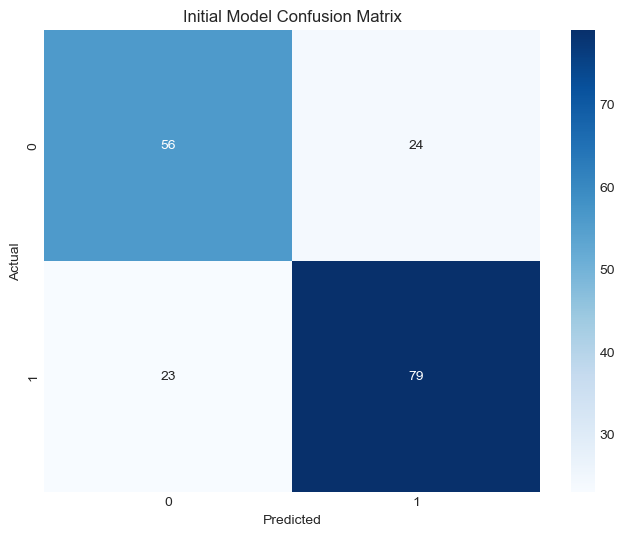


 Step 4: Hyperparameter Tuning
Fitting 5 folds for each of 144 candidates, totalling 720 fits

Best Hyperparameters found: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best F1-Score from Grid Search: 0.7927
 Optimized model trained successfully!

Step 5: Analysis and Visualization

--- Optimized Model Performance ---
Accuracy: 0.7418
Precision: 0.7835
Recall: 0.7451
F1-Score: 0.7638
ROC-AUC Score: 0.8064

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.72        80
           1       0.78      0.75      0.76       102

    accuracy                           0.74       182
   macro avg       0.74      0.74      0.74       182
weighted avg       0.74      0.74      0.74       182



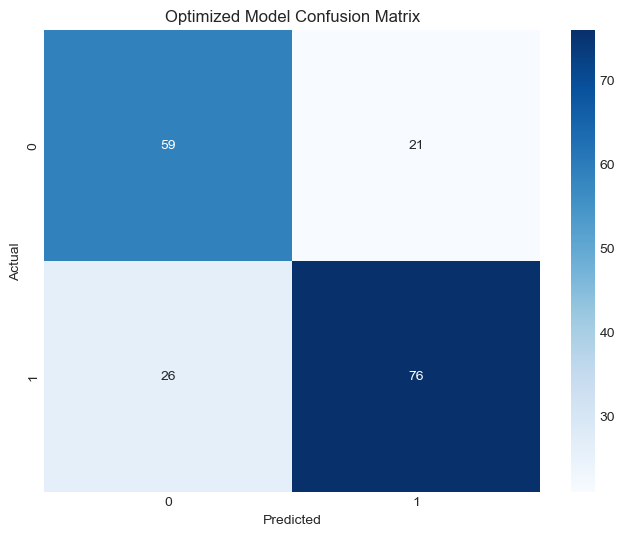

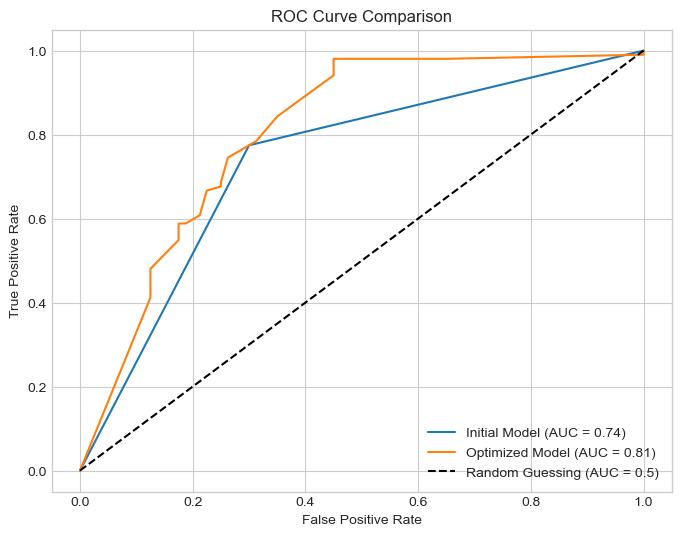


 Visualizing the optimized Decision Tree structure...


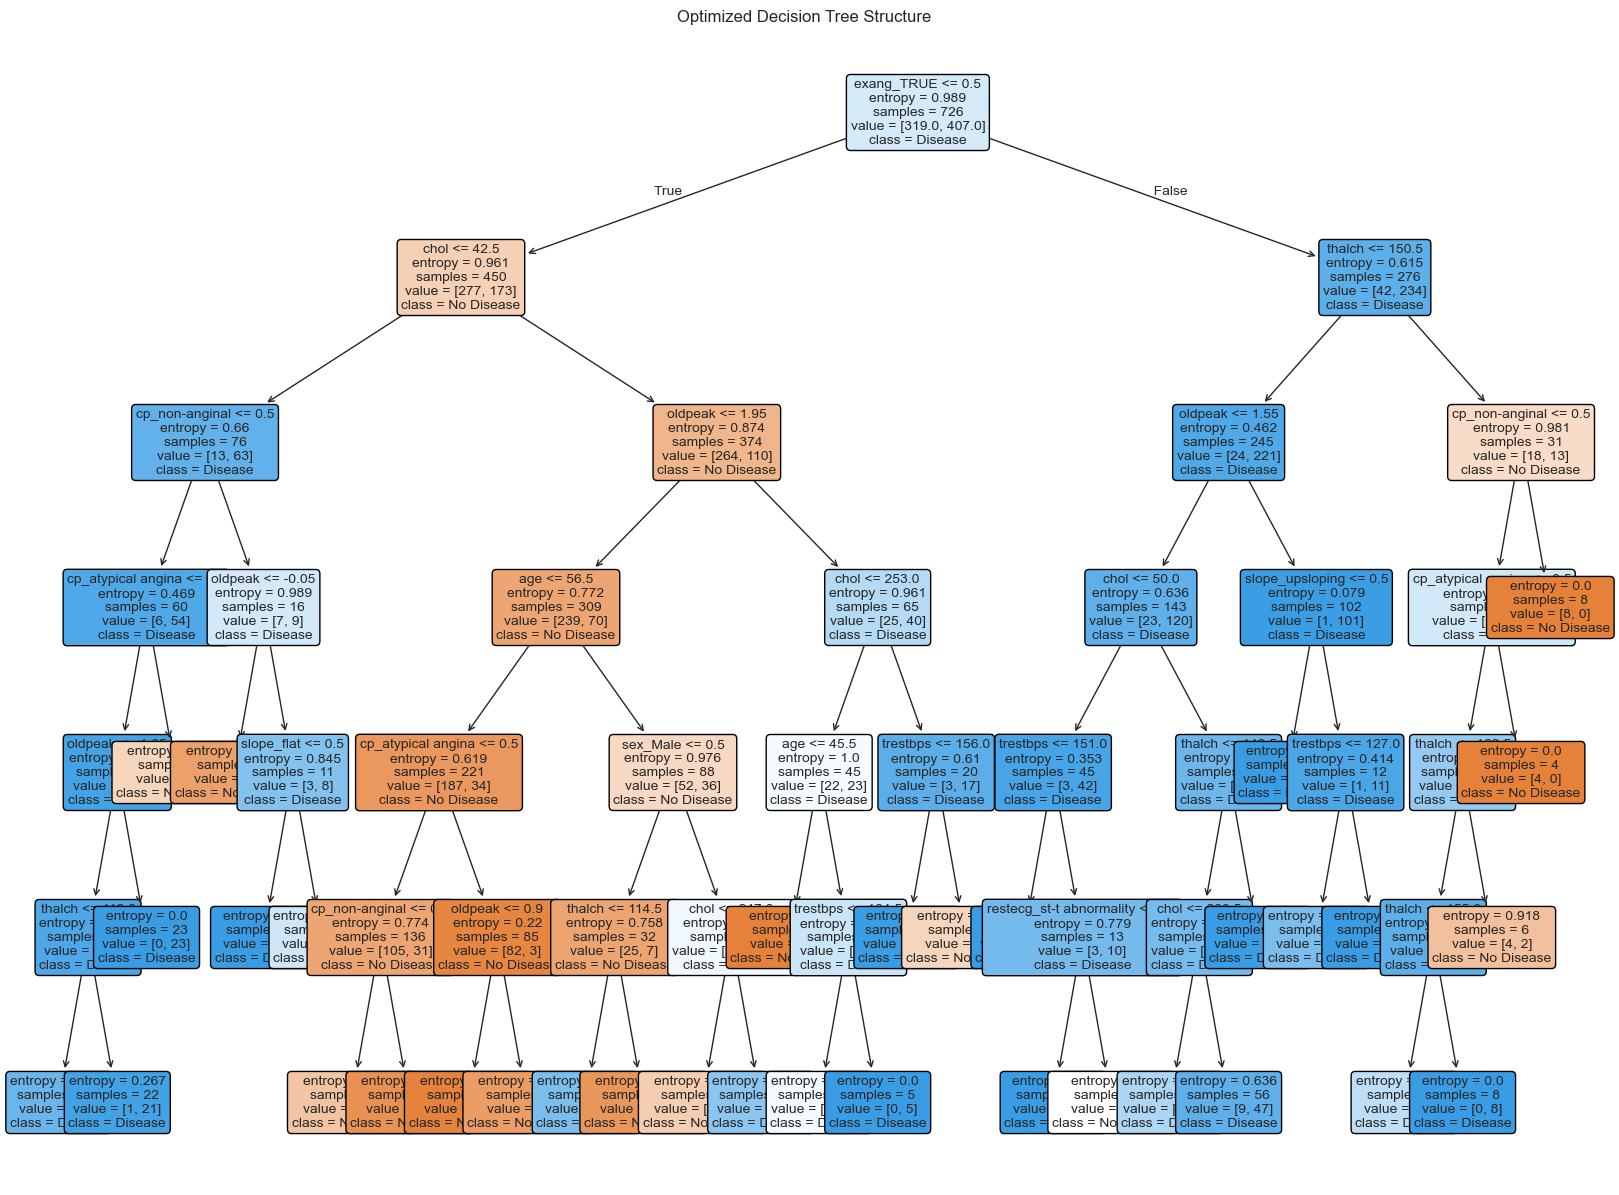


 Analyzing Feature Importances:
                     feature  importance
12                exang_TRUE    0.303223
2                       chol    0.188393
5                    oldpeak    0.128050
4                     thalch    0.111857
7         cp_atypical angina    0.065235
8             cp_non-anginal    0.056943
0                        age    0.055920
1                   trestbps    0.050204
6                   sex_Male    0.014875
11  restecg_st-t abnormality    0.010802
15           slope_upsloping    0.008216
14                slope_flat    0.006281
9          cp_typical angina    0.000000
3                        fbs    0.000000
13                exang_TURE    0.000000
10            restecg_normal    0.000000
16               thal_normal    0.000000
17    thal_reversable defect    0.000000


C:\Users\SURAJ\AppData\Local\Temp\ipykernel_23268\2103057013.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


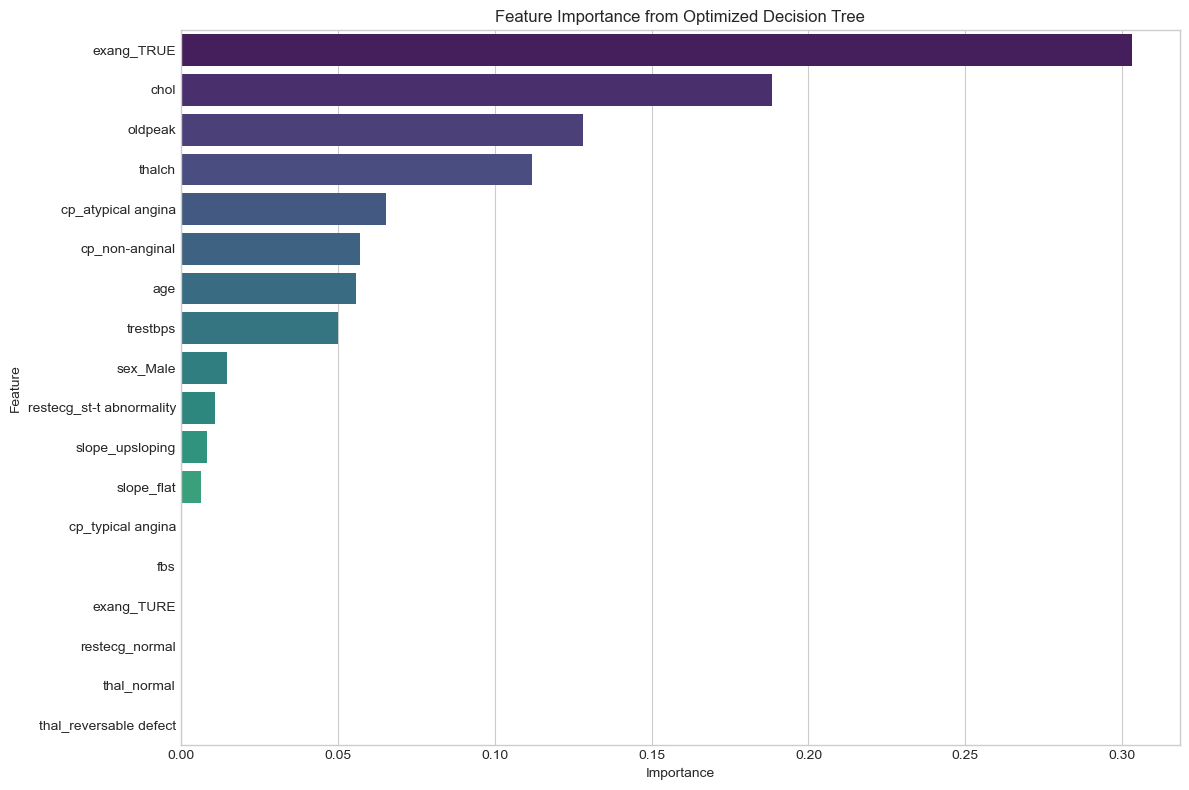


 Analysis Complete! The script has loaded the data, performed EDA, built, tuned, and evaluated a Decision Tree model, and visualized the results.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix,
)


try:
    df = pd.read_csv("heart_disease.csv")
    print(" Dataset loaded successfully!")
except FileNotFoundError:
    print(" Error: The file 'heart_disease.xlsx - Heart_disease.csv' was not found.")
    print("Please make sure the file is in the same folder and the name is correct.")
    exit()

print("\n Exploring the dataset's structure:")
df.info()

print("\n Here are the first 5 rows to give you a feel for the data:")
print(df.head())

print("\n Checking for any missing values:")
print(df.isnull().sum())


print("\nUnique values in our categorical features:")
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']:
    print(f"  - '{col}': {df[col].unique()}")


numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16)
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16)
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel('')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features + ['num']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\n🛠️ Step 2: Feature Engineering")


df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

df['fbs'] = df['fbs'].astype(int)

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.drop(columns=['num'], inplace=True)

print("\nTransformed DataFrame after one-hot encoding:")
print(df_encoded.head())

X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

print("\n Step 3: Model Building and Evaluation")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

initial_dt_model = DecisionTreeClassifier(random_state=42)
initial_dt_model.fit(X_train, y_train)
print(" Initial Decision Tree model trained successfully!")

y_pred = initial_dt_model.predict(X_test)
y_pred_proba = initial_dt_model.predict_proba(X_test)[:, 1]

print("\n--- Initial Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Initial Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\n Step 4: Hyperparameter Tuning")


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5, 
    scoring='f1', 
    n_jobs=-1, 
    verbose=1,
)
grid_search.fit(X_train, y_train)

print(f"\nBest Hyperparameters found: {grid_search.best_params_}")
print(f"Best F1-Score from Grid Search: {grid_search.best_score_:.4f}")

optimized_dt_model = grid_search.best_estimator_
optimized_dt_model.fit(X_train, y_train)
print(" Optimized model trained successfully!")

print("\nStep 5: Analysis and Visualization")

y_pred_optimized = optimized_dt_model.predict(X_test)
y_pred_proba_optimized = optimized_dt_model.predict_proba(X_test)[:, 1]

print("\n--- Optimized Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_optimized):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_optimized):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_optimized):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_optimized):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_optimized))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_optimized), annot=True, fmt='d', cmap='Blues')
plt.title('Optimized Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

initial_fpr, initial_tpr, _ = roc_curve(y_test, y_pred_proba)
optimized_fpr, optimized_tpr, _ = roc_curve(y_test, y_pred_proba_optimized)

plt.figure(figsize=(8, 6))
plt.plot(initial_fpr, initial_tpr, label=f'Initial Model (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot(optimized_fpr, optimized_tpr, label=f'Optimized Model (AUC = {roc_auc_score(y_test, y_pred_proba_optimized):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.5)')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


print("\n Visualizing the optimized Decision Tree structure...")
plt.figure(figsize=(20, 15))
plot_tree(
    optimized_dt_model,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.title('Optimized Decision Tree Structure')
plt.show()

print("\n Analyzing Feature Importances:")
feature_importances = pd.DataFrame(
    {'feature': X.columns, 'importance': optimized_dt_model.feature_importances_}
).sort_values(by='importance', ascending=False)
print(feature_importances)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance from Optimized Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n Analysis Complete! The script has loaded the data, performed EDA, built, tuned, and evaluated a Decision Tree model, and visualized the results.")